In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
# Load dataset

df = pd.read_csv("/Users/anshaya/Desktop/Capstone/Sample Code and Input/Additional Datasets and Code (Code Dx)/atom (30 May 2020).csv")

In [3]:
# Shape of the dataset

df.shape

(707, 10)

In [4]:
# Columns in the dataset

df.columns

Index(['ID', 'Severity', 'CWE', 'Type', 'Tool', 'Location', 'Path', 'FileName',
       'Line', 'Status'],
      dtype='object')

In [5]:
# Head of the dataset

df.head(n=20)

,ID,Severity,CWE,Type,Tool,Location,Path,FileName,Line,Status
0,66621,High,22.0,Path Traversal,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,52,Escalated
1,66622,Medium,665.0,Initialization,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,4,False Positive
2,66623,Medium,665.0,Initialization,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,8,False Positive
3,66624,High,22.0,Path Traversal,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,35,Escalated
4,66626,Medium,665.0,Initialization,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,6,False Positive
5,66627,Medium,665.0,Initialization,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,10,False Positive
6,66628,Medium,665.0,Initialization,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,12,False Positive
7,66630,Medium,665.0,Initialization,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,16,False Positive
8,66631,Medium,665.0,Initialization,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,31,False Positive
9,66633,Medium,665.0,Initialization,ESLint,Atom x64\resources\app\apm\lib\link.js,Atom x64\resources\app\apm\lib,NaN,14,False Positive


In [6]:
# Target variable values

df["Status"].unique()

array(['Escalated', 'False Positive'], dtype=object)

In [7]:
# Check null values

df.isnull().sum()

ID            0
Severity      0
CWE           1
Type          0
Tool          0
Location      0
Path          0
FileName    707
Line          0
Status        0
dtype: int64

In [8]:
# Treat null values

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

ID            0.000000
Severity      0.000000
CWE           0.141443
Type          0.000000
Tool          0.000000
Location      0.000000
Path          0.000000
FileName    100.000000
Line          0.000000
Status        0.000000
dtype: float64

In [9]:
for column in df.columns:
    if missing_percentage[column] > 70:
        df.drop(column, axis=1, inplace= True)

In [10]:
mode = df['CWE'].mode()[0]
df['CWE'].fillna(mode, inplace=True)

In [11]:
null_counts = df.isnull().sum()
null_counts

ID          0
Severity    0
CWE         0
Type        0
Tool        0
Location    0
Path        0
Line        0
Status      0
dtype: int64

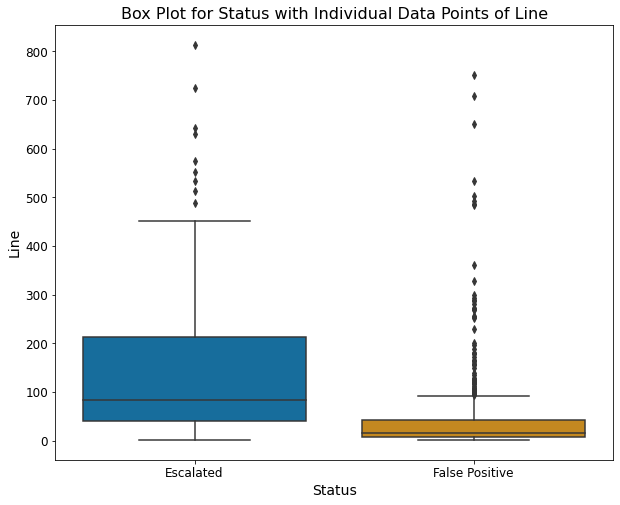

In [14]:
# A boxplot for Status with individual data points of Line
# Set figure size

plt.figure(figsize=(10, 8))

sns.boxplot(x='Status', y='Line', data=df, showfliers=True, width=0.8, palette="colorblind")
# sns.stripplot(x='Status', y='Line', data=df, color='black', jitter=0.4, alpha=0.2)

# labels and title
plt.xlabel('Status', fontsize=14)
plt.ylabel('Line', fontsize=14)
plt.title('Box Plot for Status with Individual Data Points of Line', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


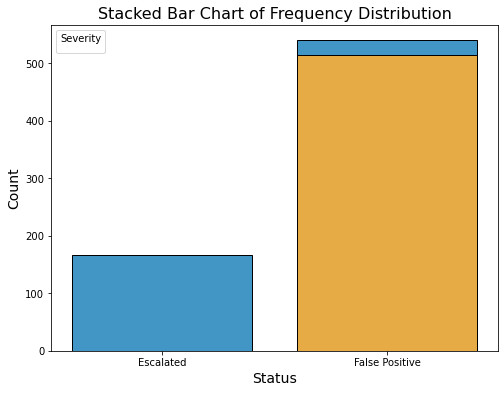

In [13]:
# A bar graph for frquency distribution
# Set figure size

plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='Status', hue='Severity', multiple='stack', shrink=0.8, palette='colorblind')

# labels and title
plt.xlabel('Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Stacked Bar Chart of Frequency Distribution', fontsize=16)
plt.legend(title='Severity')

plt.show()

/var/folders/n7/096q9yp916b5l261qspwb0fc0000gn/T/ipykernel_84143/2059041993.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/n7/096q9yp916b5l261qspwb0fc0000gn/T/ipykernel_84143/2059041993.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/n7/096q9yp916b5l261qspwb0fc0000gn/T/ipykernel_84143/2059041993.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/n7/096q9yp916b5l261qspwb0fc0000gn/T/ipykernel_84143/2059041993.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/n7/096q9yp916b5l261qspwb0fc0000gn/T/ipykernel_84143/2059041993.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1), (rco

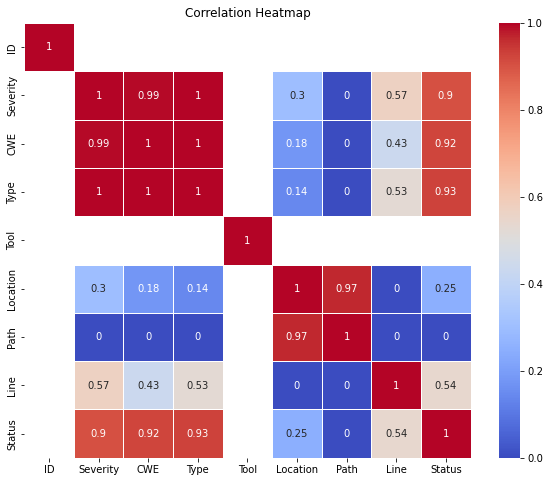

In [15]:
# Correlation Matrix

from scipy.stats import chi2_contingency

# A DataFrame with categorical data
columns_for_correlation = ['ID','Severity','CWE','Type','Tool','Location','Path','Line','Status']
data = df[columns_for_correlation]

# A function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# An empty correlation matrix
num_features = len(data.columns)
correlation_matrix = np.zeros((num_features, num_features))

# Calculate Cramer's V for each pair of categorical variables
for i in range(num_features):
    for j in range(num_features):
        if i == j:
            correlation_matrix[i, j] = 1.0
        else:
            correlation_matrix[i, j] = cramers_v(data.iloc[:, i], data.iloc[:, j])

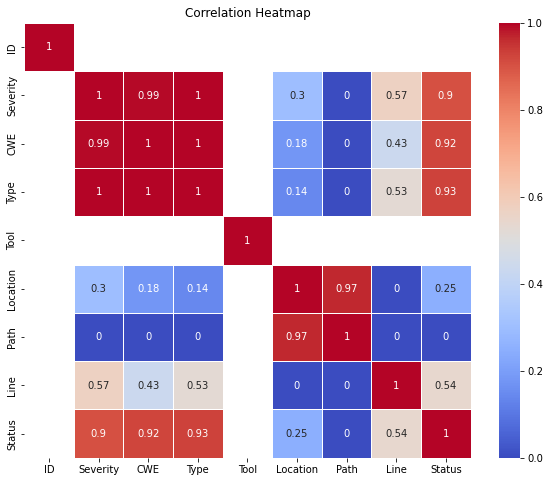

In [16]:
# The correlation matrix
correlation_df = pd.DataFrame(correlation_matrix, columns=data.columns, index=data.columns)

correlation_matrix = correlation_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()

In [17]:
# Drop unnecessary columns

for x in ['ID','Tool','Path']:
    df.drop(x, axis=1, inplace= True)

In [18]:
# Input variables for modelling

ip_variables = ['Severity','CWE','Type','Location','Line',]

In [19]:
# Transform required columns

X = df[ip_variables]
y = df['Status']

categorical_cols = ['Severity','CWE','Type','Location']
numerical_cols = ['Line']

# The transformer
categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[
        ('categorical', categorical_transformer)
    ]
)

In [20]:
# Train-test split

X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [22]:
# A Logistic Regression classifier

lr_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_lr_pred = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9225352112676056


/Users/anshaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


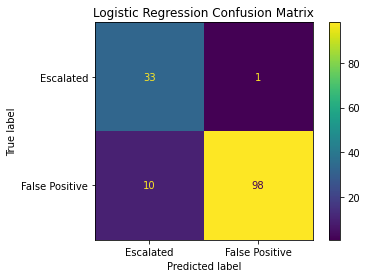

In [23]:
# The logistic Regression confusion matrix

lg_confusion = confusion_matrix(y_test, y_lr_pred)

plot_confusion_matrix(lr_classifier, X_test, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [24]:
# Parameters for a Random Forest Classifier

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=1,  # Adjust the number of iterations
    cv=5
)

random_search.fit(X_train, y_train)

# The best parameters
best_params = random_search.best_params_

In [25]:
# A Random Forest Classifier

best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

best_rf_model.fit(X_train, y_train)

y_rf_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9366197183098591


/Users/anshaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


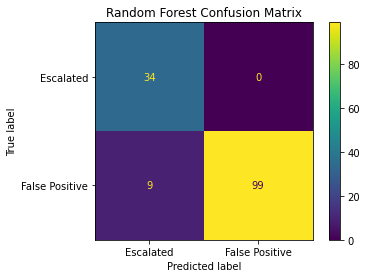

In [26]:
# The Random Forest confusion matrix

rf_confusion = confusion_matrix(y_test, y_rf_pred)

plot_confusion_matrix(best_rf_model, X_test, y_test)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [27]:
# An Support Vector Machine Classifier

svm_classifier = SVC(kernel='poly', C=1.0) 
svm_classifier.fit(X_train, y_train)

y_svm_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_svm_pred)
print('Support Vector Machine Accuracy: ', accuracy)

Support Vector Machine Accuracy:  0.7887323943661971


/Users/anshaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


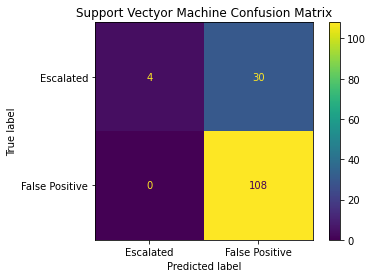

In [28]:
# The Support Vector Machine confusion matrix

SVM_confusion = confusion_matrix(y_test, y_svm_pred)

plot_confusion_matrix(svm_classifier, X_test, y_test)
plt.title('Support Vectyor Machine Confusion Matrix')
plt.show()

In [29]:
# The K-Nearest Neighbor Classifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_knn_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_knn_pred)
print('The K-Nearest Neighbor Accuracy: ', accuracy)

The K-Nearest Neighbor Accuracy:  0.8380281690140845


/Users/anshaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


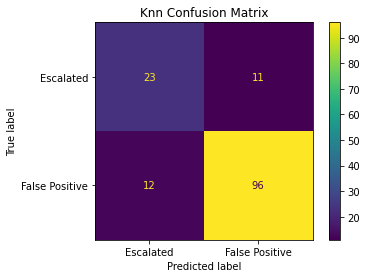

In [30]:
# The K-Nearest Neighbor confusion matrix
Knn_confusion = confusion_matrix(y_test, y_knn_pred)

plot_confusion_matrix(knn_classifier, X_test, y_test)
plt.title('Knn Confusion Matrix')
plt.show()